In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

import csv
import numpy as np


from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import scores

In [2]:

# # Reading in the Data

path_f=os.getcwd()

path_f_1=os.path.join(path_f, 'data')


names=[]
for files_txts in os.listdir(path_f_1):
    if files_txts.endswith(".csv"):
        #print(files_txts)
        names.append(files_txts)
        
path_train=os.path.join(path_f_1, names[0])
path_test=os.path.join(path_f_1, names[1])

df_train=pd.read_csv(path_train)
df_train.shape


# ## Data Manipulation
print('Training Data is being read ....')
#  - Transforming the outcome to a numpy vector

stab_vector=df_train['stabilityVec'].values
y=[]
for x in stab_vector:
    #print(x)
    a=np.fromstring(x[1:-1],sep=',').astype(int)
    y.append(a)
y=np.array(y) 

df_tmp = pd.DataFrame(y, columns = ['A', 'A91B', 'A82B','A73B','A64B','A55B','A46B','A37B','A28B','A19B','B'])
stab_vec_list=[ 'A91B', 'A82B','A73B','A64B','A55B','A46B','A37B','A28B','A19B']

df_train=df_train.drop("stabilityVec",axis=1) #removing the results which originally are a string
feature_cols=list(df_train)

print(df_train.shape)

csvfile = csv.reader(open(path_train,'r'))
header = next(csvfile)

formulaA = []
formulaB = []

for row in csvfile:
    formulaA.append(row[0])
    formulaB.append(row[1])
formulas = formulaA + formulaB
formulas = list(set(formulas))

# -- /!\ need to save the dict as the ordering may difer at each run
formula2int = {}
int2formula = {}
for i, f in enumerate(formulas):
    formula2int[f] = i
    int2formula[i] = f

formulaAint = np.array([formula2int[x] for x in formulaA])
formulaBint = np.array([formula2int[x] for x in formulaB])

df_train['formulaA']=formulaAint
df_train['formulaB']=formulaBint

df_train=pd.concat([df_train, df_tmp],axis=1)
print(df_train.shape)

# ### Input Data Normalization and Feature Engineering
print('Training Data has been read and feature engineering is being performed....')

y_all=df_train[stab_vec_list]
df_tmp_stable = pd.DataFrame( columns = ['Stable_compunds'])
df_tmp_stable['Stable_compunds']=np.logical_not(y_all.sum(axis=1)==0).astype(int) ## A one means it has a stable value  a 0 

df_train=pd.concat([df_train, df_tmp_stable],axis=1)
print(df_train.shape)

df_train.head()





Training Data is being read ....
(2572, 98)
(2572, 109)
Training Data has been read and feature engineering is being performed....
(2572, 110)


,formulaA,formulaB,formulaA_elements_AtomicVolume,formulaB_elements_AtomicVolume,formulaA_elements_AtomicWeight,formulaB_elements_AtomicWeight,formulaA_elements_BoilingT,formulaB_elements_BoilingT,formulaA_elements_BulkModulus,formulaB_elements_BulkModulus,...,A82B,A73B,A64B,A55B,A46B,A37B,A28B,A19B,B,Stable_compunds
0,36,44,37.433086,17.075648,227.0,107.868200,3473.0,2435.0,0.0,100.0,...,0,1,0,1,0,0,0,0,1,1
1,36,72,37.433086,16.594425,227.0,26.981539,3473.0,2792.0,0.0,76.0,...,0,1,0,0,0,0,0,0,1,1
2,36,62,37.433086,21.723966,227.0,74.921600,3473.0,887.0,0.0,22.0,...,0,0,0,0,0,0,0,0,1,0
3,36,16,37.433086,64.969282,227.0,137.327000,3473.0,2143.0,0.0,9.6,...,0,0,0,0,0,0,0,0,1,0
4,36,45,37.433086,35.483459,227.0,208.980400,3473.0,1837.0,0.0,31.0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
print(names)

['training_data.csv', 'test_data.csv']


## Now getting the Output for each Vector Component


In [5]:
## Observing how many element pairs produce a stable compound per % and overall

y_all=df_train[stab_vec_list]

for count in range(0,1):
    
    y = df_train[stab_vec_list[count]]
    print(y.value_counts())

    stable_comp=df_train.loc[y==1,['formulaA','formulaB']] # Find the elements that create a stable element in this vector component
    print('Compound being analyzed is',stab_vec_list[count])
    stable_comp_num=stable_comp.values
    stable_A=np.unique(stable_comp_num[:,0])
    stable_B=np.unique(stable_comp_num[:,1])
    
    df_unique= pd.DataFrame()

    y_unique= pd.DataFrame()
    
    for cnt in range(stable_A.shape[0]):

        df_tmp1=y.loc[df_train['formulaA']==stable_A[cnt]]
        y_unique=pd.concat([y_unique, df_tmp1],axis=0)
        
        df_tmp=df_train.loc[df_train['formulaA']==stable_A[cnt]]
        df_unique=pd.concat([df_unique, df_tmp],axis=0)
        

    


    for cnt in range(stable_B.shape[0]):
        df_tmp1=y.loc[df_train['formulaB']==stable_B[cnt]]
        y_unique=pd.concat([y_unique, df_tmp1],axis=0)
        
        df_tmp=df_train.loc[df_train['formulaB']==stable_B[cnt]]
        df_unique=pd.concat([df_unique, df_tmp],axis=0)

    
    y_unique=y.iloc[y_unique.index.unique()]
    df_unique=df_train.iloc[df_unique.index.unique()]
    print(y_unique.value_counts())
    print('The elements in these compounds create a stable compound for this component of the stability vector:',y_unique.shape)
    
    
    y_stable=y_unique.loc[np.logical_not(y_all.sum(axis=1)==0)]
    df_stable=df_unique.loc[np.logical_not(y_all.sum(axis=1)==0)]
    print(y_stable.value_counts())
    print('The elements in these compounds create a stable compound for this component of the stability vector and create at least one stable compound:',y_stable.shape)



0    2522
1      50
Name: A91B, dtype: int64
Compound being analyzed is A91B
0    1332
1      50
Name: A91B, dtype: int64
The elements in these compounds create a stable compound for this component of the stability vector: (1382,)
0    580
1     50
Name: A91B, dtype: int64
The elements in these compounds create a stable compound for this component of the stability vector and create at least one stable compound: (630,)


In [6]:
# Pearson Correlation to Identify the features that influence the most on the output 
print('Pearson Correlation has been calculated to build the model in the most relevant features ....')
X_train_new=df_stable[feature_cols] #This means we will only train on the elements that create a stable compound for this component of the stability vector and have at least one stable compound

y_new=y_stable
print('Number of Results to train on:',y_new.shape)
print('Number of Training Features before Pearson correlation:', X_train_new.shape[1])

corr_df=pd.concat([X_train_new, y_new],axis=1)
a=corr_df.corr()
#a['Stable_compunds'].hist(bins=7, figsize=(18, 12), xlabelsize=10)

## Incorporating the Features that contribute the most based on a pearson correlation coefficient threshold

thr=.1

corr_variables=list(a[a[stab_vec_list[count]].abs()>thr].index)

del(corr_variables[-1])


print('Pearson Correlation has identified', len(corr_variables), 'with ', str(thr) )

## Normalization of Input Data

## Using Un-normalized data as input
X_train_new=df_stable[corr_variables]

print('Number of Training Features after Pearson correlation:', X_train_new.shape[1])


# Normalizing such that the magnitude is one
from sklearn.preprocessing import normalize

X_train_new_mag_1=normalize(X_train_new, axis=1) # vector magnitude is one
print(X_train_new_mag_1.shape)


## Normalizing by Zscore
from scipy.stats import zscore
X_train_new_Z_score=X_train_new.apply(zscore)
print(X_train_new_Z_score.shape)



## Normalizing so that range is 0-1
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_new_0_1=min_max_scaler.fit_transform(X_train_new)
print(X_train_new_0_1.shape)


## Normalizing so that range is -1 to 1
from sklearn import preprocessing
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_new_m1_p1=max_abs_scaler.fit_transform(X_train_new)
print(X_train_new_m1_p1.shape)


# Using PCA as input
X_train_4_PCA=df_stable[feature_cols]
indx_4_PC=X_train_4_PCA.index
X_train_new_mag_1_PCA=normalize(X_train_4_PCA, axis=1)


pca = PCA()
pca.fit(X_train_new_mag_1_PCA)
components = pca.components_[:20,:]
new_data = np.dot(X_train_new_mag_1_PCA, components.T)
X_train_new_PCA=new_data

print(X_train_new_PCA.shape)

## Using Pearson Correlation in PCA
df1= pd.DataFrame(data=X_train_new_PCA, index=indx_4_PC)
print(df1.shape)

corr_df_PCA=pd.concat([df1, y_new],axis=1)


a_PCA=corr_df_PCA.corr()

thr=.05
corr_variables_PCA=list(a_PCA[a_PCA[stab_vec_list[count]].abs()>thr].index)


del(corr_variables_PCA[-1])

print('Pearson Correlation in PCA Space has identified', len(corr_variables_PCA), 'with ', str(thr) )

X_train_PCA_PC=df1[corr_variables_PCA]

print('Number of Training Features after Pearson correlation in PCA Space:', X_train_PCA_PC.shape[1])








Pearson Correlation has been calculated to build the model in the most relevant features ....
Number of Results to train on: (630,)
Number of Training Features before Pearson correlation: 98
Pearson Correlation has identified 31 with  0.1
Number of Training Features after Pearson correlation: 31
(630, 31)
(630, 31)
(630, 31)
(630, 31)
(630, 20)
(630, 20)
Pearson Correlation in PCA Space has identified 13 with  0.05
Number of Training Features after Pearson correlation in PCA Space: 13


## Model Generation

In [7]:
## test-train split
X_train, X_test, y_train, y_test = train_test_split(X_train_new_m1_p1, y_new,
                                                    test_size=.1,
                                                    shuffle=True,
                                                    random_state=42)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
#X_train.head()

(567, 31) (567,)
(63, 31) (63,)


In [8]:
print(y_test.mean())
print(y_train.mean())
print(y_new.mean())
print(y_new.value_counts())
print(y_test.value_counts())

0.09523809523809523
0.07760141093474426
0.07936507936507936
0    580
1     50
Name: A91B, dtype: int64
0    57
1     6
Name: A91B, dtype: int64


In [ ]:
# Defining the Grid
print(' -- Random Forest --')
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)

from sklearn.model_selection import GridSearchCV  

grid_param = {  
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': [ 'entropy'],
    'bootstrap': [True, False],
    'max_depth':[1, 5, 10, 20],
    'min_samples_split':[10,20 ,50 ,60 ,90 ,120],
    'min_samples_leaf':[2 ,5 ,10, 25 ,50 ,90 ,120],
    'min_impurity_decrease':[5e-7, 1e-6, 1e-5],
}

gd_sr = GridSearchCV(estimator=rfc,  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)

gd_sr.fit(X_train, y_train)

best_parameters = gd_sr.best_params_  
print(best_parameters) 
best_result = gd_sr.best_score_  
print(best_result) 

In [102]:
## Fitting best Model
print(' -- Optimal Random Forest --')
from sklearn.ensemble import RandomForestClassifier

rfc_opt = RandomForestClassifier(n_estimators=100,criterion='entropy',bootstrap=True,max_depth=100, 
                                 class_weight={0:1-y_train.mean(), 1:y_train.mean()},
                                 min_samples_split=10,
                                 min_samples_leaf=2,
                                 min_impurity_decrease=5e-7,
                                 random_state=0
                                 ,n_jobs=-1)
rfc_opt.fit(X_train, y_train)

train_pred = rfc_opt.predict(X_train)
    
precision,recall,F1,accuracy,confusion,roc_auc=scores.scores(y_train,train_pred)
print('Training precision: ', precision, '  recall: ', recall, '  F1: ', F1, '  accuracy: ', accuracy)
print('Training Confusion matrix')
print(confusion)
print('Training AUC:',roc_auc)


y_pred = rfc_opt.predict(X_test)


precision,recall,F1,accuracy,confusion,roc_auc=scores.scores(y_test,y_pred)
print('Optimal precision: ', precision, '  recall: ', recall, '  F1: ', F1, '  accuracy: ', accuracy)
print('optimal Confusion matrix')
print(confusion)
print('Optimal AUC:',roc_auc)


## Compare to Default Model
print(' -- Default Random Forest --')
from sklearn.ensemble import RandomForestClassifier
rfc_def = RandomForestClassifier(class_weight={0:1-y_train.mean(), 1:y_train.mean()},n_jobs=-1,random_state=0)
rfc_def.fit(X_train, y_train)

y_pred = rfc_def.predict(X_test)



precision,recall,F1,accuracy,confusion,roc_auc=scores.scores(y_test,y_pred)
print('Defualt Model precision: ', precision, '  recall: ', recall, '  F1: ', F1, '  accuracy: ', accuracy)
print('Defualt ModelConfusion matrix')
print(confusion)
print('Defualt ModelAUC:',roc_auc)

 -- Optimal Random Forest --
Training precision:  1.0   recall:  0.20454545454545456   F1:  0.339622641509434   accuracy:  0.9382716049382716
Training Confusion matrix
[[523   0]
 [ 35   9]]
Training AUC: 0.6022727272727273
Optimal precision:  0.0   recall:  0.0   F1:  0.0   accuracy:  0.9047619047619048
optimal Confusion matrix
[[57  0]
 [ 6  0]]
Optimal AUC: 0.5
 -- Default Random Forest --


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Defualt Model precision:  0.0   recall:  0.0   F1:  0.0   accuracy:  0.9047619047619048
Defualt ModelConfusion matrix
[[57  0]
 [ 6  0]]
Defualt ModelAUC: 0.5


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0.5,0,'Value')

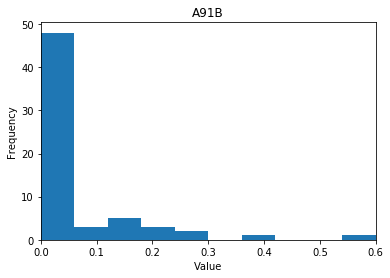

In [14]:
y_scores = rfc_opt.predict_proba(X_test)[:, 1]
hist_1, bin_edges_1 = np.histogram(y_scores)
freq_1=hist_1/y_scores.size
    
plt.hist(y_scores, bins=10, label='all elements')


plt.xlim(min(bin_edges_1), max(bin_edges_1))
plt.title(stab_vec_list[count])
plt.ylabel('Frequency')
plt.xlabel('Value')

Text(0.5,0,'Value')

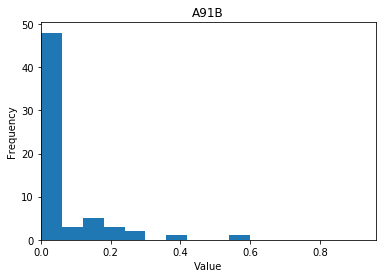

In [15]:
y_scores_train = rfc_opt.predict_proba(X_train)[:, 1]
hist_1, bin_edges_1 = np.histogram(y_scores_train)
freq_1=hist_1/y_scores_train.size
    
plt.hist(y_scores, bins=10, label='all elements')


plt.xlim(min(bin_edges_1), max(bin_edges_1))
plt.title(stab_vec_list[count])
plt.ylabel('Frequency')
plt.xlabel('Value')

In [16]:
# Get numerical feature importances
importances = list(rfc_opt.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(corr_variables, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: formulaA_elements_Polarizability Importance: 0.07
Variable: formulaA_elements_CovalentRadius Importance: 0.05
Variable: formulaA_elements_MendeleevNumber Importance: 0.05
Variable: formulaA_elements_MiracleRadius Importance: 0.05
Variable: avg_nearest_neighbor_distance_A Importance: 0.05
Variable: formulaA_elements_FirstIonizationEnergy Importance: 0.04
Variable: formulaA_elements_GSestBCClatcnt Importance: 0.04
Variable: formulaA_elements_GSvolume_pa Importance: 0.04
Variable: formulaA_elements_ICSDVolume Importance: 0.04
Variable: formulaA_elements_NValance Importance: 0.04
Variable: formulaA_elements_AtomicVolume Importance: 0.03
Variable: formulaB_elements_AtomicVolume Importance: 0.03
Variable: formulaB_elements_AtomicWeight Importance: 0.03
Variable: formulaB_elements_CovalentRadius Importance: 0.03
Variable: formulaB_elements_ElectronSurfaceDensityWS Importance: 0.03
Variable: formulaA_elements_Electronegativity Importance: 0.03
Variable: formulaA_elements_GSestFCClatc

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

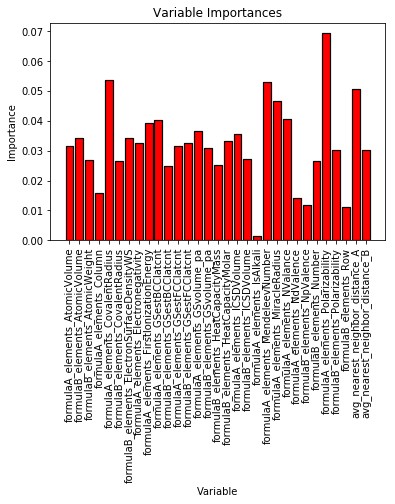

In [17]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, corr_variables, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

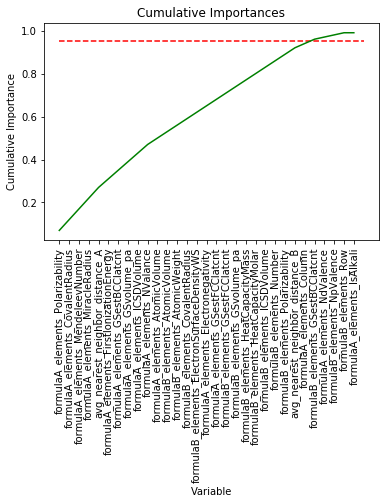

In [18]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [19]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 27


## Boosting and Bagging the Models

In [82]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
print('------- Extra Trees Classifier-------')
clf_ex = ExtraTreesClassifier(class_weight={0:1-y_train.mean(), 1:y_train.mean()})

all_accuracies = cross_val_score(estimator=clf_ex, X=X_train, y=y_train, cv=10)


print(all_accuracies.mean())

clf_ex.fit(X_train, y_train)

y_pred = clf_ex.predict(X_test)



precision,recall,F1,accuracy,confusion,roc_auc=scores.scores(y_test,y_pred)
print('Defualt Model precision: ', precision, '  recall: ', recall, '  F1: ', F1, '  accuracy: ', accuracy)
print('Defualt ModelConfusion matrix')
print(confusion)
print('Defualt ModelAUC:',roc_auc)

y_scores = clf_ex.predict_proba(X_test)[:, 1]

y_pred_adj = scores.adjusted_classes(y_scores, .1)

precision,recall,F1,accuracy,confusion,roc_auc=scores.scores(y_test,y_pred_adj)
print('Adjusted Threshold precision: ', precision, '  recall: ', recall, '  F1: ', F1, '  accuracy: ', accuracy)
print('Adjusted Threshold Confusion matrix')
print(confusion)
print('Adjusted Threshold AUC:',roc_auc)


------- Extra Trees Classifier-------
0.9241714199291332
Defualt Model precision:  1.0   recall:  0.16666666666666666   F1:  0.2857142857142857   accuracy:  0.9206349206349206
Defualt ModelConfusion matrix
[[57  0]
 [ 5  1]]
Defualt ModelAUC: 0.5833333333333334
Adjusted Threshold precision:  0.36363636363636365   recall:  0.6666666666666666   F1:  0.4705882352941177   accuracy:  0.8571428571428571
Adjusted Threshold Confusion matrix
[[50  7]
 [ 2  4]]
Adjusted Threshold AUC: 0.7719298245614035


Text(0.5,0,'Value')

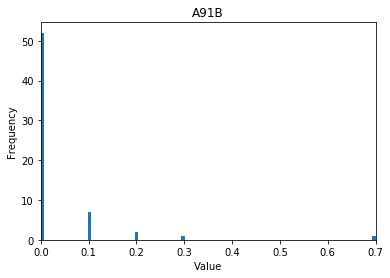

In [84]:
y_scores = clf_ex.predict_proba(X_test)[:, 1]
hist_1, bin_edges_1 = np.histogram(y_scores)
freq_1=hist_1/y_scores.size
    
plt.hist(y_scores, bins=100, label='all elements')


plt.xlim(min(bin_edges_1), max(bin_edges_1))
plt.title(stab_vec_list[count])
plt.ylabel('Frequency')
plt.xlabel('Value')

In [90]:
## ADAboosting
print('------ ADAboosting with Random Forest ----')
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(base_estimator=clf_ex, n_estimators=500,learning_rate=.01)

all_accuracies = cross_val_score(estimator=clf,X=X_train, y=y_train, cv=10)

print(all_accuracies.mean())

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)



precision,recall,F1,accuracy,confusion,roc_auc=scores.scores(y_test,y_pred)
print('Defualt Model precision: ', precision, '  recall: ', recall, '  F1: ', F1, '  accuracy: ', accuracy)
print('Defualt ModelConfusion matrix')
print(confusion)
print('Defualt ModelAUC:',roc_auc)

y_scores = clf.predict_proba(X_test)[:, 1]

y_pred_adj = scores.adjusted_classes(y_scores, .1)

precision,recall,F1,accuracy,confusion,roc_auc=scores.scores(y_test,y_pred_adj)
print('Adjusted Threshold precision: ', precision, '  recall: ', recall, '  F1: ', F1, '  accuracy: ', accuracy)
print('Adjusted Threshold Confusion matrix')
print(confusion)
print('Adjusted Threshold AUC:',roc_auc)

------ ADAboosting with Random Forest ----
0.9208149684556217
Defualt Model precision:  1.0   recall:  0.16666666666666666   F1:  0.2857142857142857   accuracy:  0.9206349206349206
Defualt ModelConfusion matrix
[[57  0]
 [ 5  1]]
Defualt ModelAUC: 0.5833333333333334
Adjusted Threshold precision:  0.21428571428571427   recall:  0.5   F1:  0.3   accuracy:  0.7777777777777778
Adjusted Threshold Confusion matrix
[[46 11]
 [ 3  3]]
Adjusted Threshold AUC: 0.6535087719298247


Text(0.5,0,'Value')

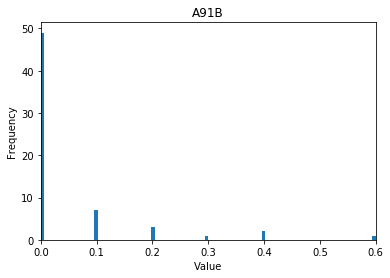

In [91]:
y_scores = clf.predict_proba(X_test)[:, 1]
hist_1, bin_edges_1 = np.histogram(y_scores)
freq_1=hist_1/y_scores.size
    
plt.hist(y_scores, bins=100, label='all elements')


plt.xlim(min(bin_edges_1), max(bin_edges_1))
plt.title(stab_vec_list[count])
plt.ylabel('Frequency')
plt.xlabel('Value')

In [81]:
## Gradient boosting
print('------ Gradient Boosting with Decision Trees ----')
from sklearn.ensemble import GradientBoostingClassifier

clf  = GradientBoostingClassifier(n_estimators=1000, learning_rate=.1)

all_accuracies = cross_val_score(estimator=clf,X=X_train, y=y_train, cv=10)

print(all_accuracies.mean())

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)



precision,recall,F1,accuracy,confusion,roc_auc=scores.scores(y_test,y_pred)
print('Defualt Model precision: ', precision, '  recall: ', recall, '  F1: ', F1, '  accuracy: ', accuracy)
print('Defualt ModelConfusion matrix')
print(confusion)
print('Defualt ModelAUC:',roc_auc)

y_scores = clf.predict_proba(X_test)[:, 1]

y_pred_adj = scores.adjusted_classes(y_scores, .0001)

precision,recall,F1,accuracy,confusion,roc_auc=scores.scores(y_test,y_pred_adj)
print('Adjusted Threshold precision: ', precision, '  recall: ', recall, '  F1: ', F1, '  accuracy: ', accuracy)
print('Adjusted Threshold Confusion matrix')
print(confusion)
print('Adjusted Threshold AUC:',roc_auc)

------ Gradient Boosting with Decision Trees ----
0.9260187105695273
Defualt Model precision:  1.0   recall:  0.16666666666666666   F1:  0.2857142857142857   accuracy:  0.9206349206349206
Defualt ModelConfusion matrix
[[57  0]
 [ 5  1]]
Defualt ModelAUC: 0.5833333333333334
Adjusted Threshold precision:  0.3333333333333333   recall:  0.6666666666666666   F1:  0.4444444444444444   accuracy:  0.8412698412698413
Adjusted Threshold Confusion matrix
[[49  8]
 [ 2  4]]
Adjusted Threshold AUC: 0.763157894736842


Text(0.5,0,'Value')

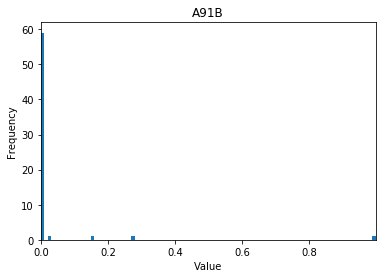

In [80]:
y_scores = clf.predict_proba(X_test)[:, 1]
hist_1, bin_edges_1 = np.histogram(y_scores)
freq_1=hist_1/y_scores.size
    
plt.hist(y_scores, bins=100, label='all elements')


plt.xlim(min(bin_edges_1), max(bin_edges_1))
plt.title(stab_vec_list[count])
plt.ylabel('Frequency')
plt.xlabel('Value')

In [ ]:
y_pred

In [ ]:
y_test.values

In [ ]:
y_pred[np.logical_not(y_pred==y_test.values)]

In [ ]:
y_scores[-1]

In [ ]:
df_train.iloc[1769]

In [ ]:
X_train_new[X_train_new.index==1769]


In [ ]:
print(' -- Optimal Random Forest --')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score 
rfc_opt = RandomForestClassifier()

all_accuracies = cross_val_score(estimator=rfc_opt, X=X_train, y=y_train, cv=10)


all_accuracies

In [ ]:
rfc_opt.fit(X_train, y_train)

y_train_pred = rfc_opt.predict(X_train)
precision,recall,F1,accuracy,confusion,roc_auc=scores.scores(y_train,y_train_pred)
print('Training  precision: ', precision, '  recall: ', recall, '  F1: ', F1, '  accuracy: ', accuracy)
print('Training Confusion matrix')
print(confusion)
print('Training AUC:',roc_auc)

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='r', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)
    plt.show()



In [20]:
from sklearn.metrics import roc_curve, auc,precision_recall_curve
p, r, thresholds = precision_recall_curve(y_test, y_scores)


In [25]:
scores.precision_recall_threshold(p, r, thresholds, 0.15)

NameError: name 'y_scores' is not defined

In [26]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

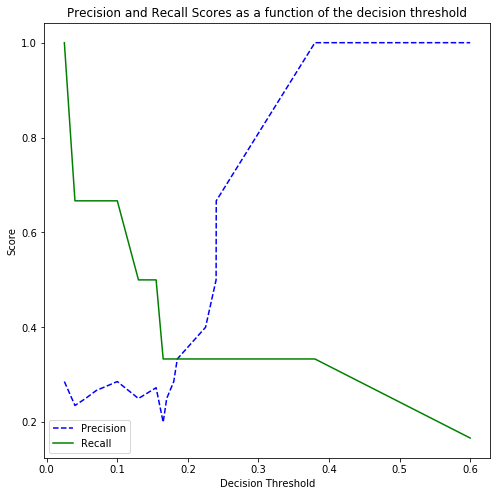

In [24]:
plot_precision_recall_vs_threshold(p, r, thresholds)

In [27]:
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

0.8669590643274854


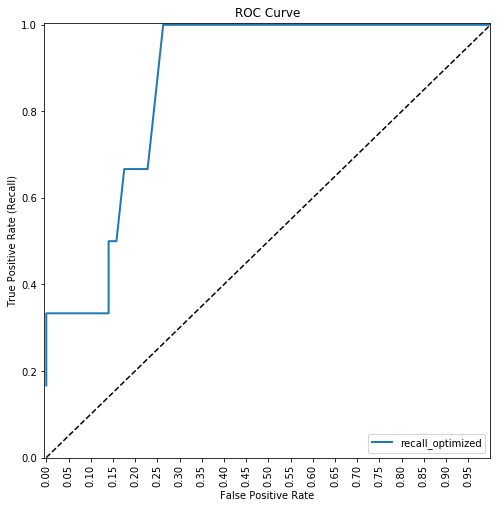

In [28]:
fpr, tpr, auc_thresholds = roc_curve(y_test, y_scores)
print(auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')


In [ ]:
# Hyper-Parameter Search Grid Using 10-Fold CV and Test
print(' -- Random Forest --')

n_estimators = [50,100,200]
criterion=['gini', 'entropy']
bootstrap= [True, False]
max_depth=[10, 20,30]


df_results_RF=scores.hp_tune_Random_Forest(X_train,y_train,X_test,y_test,10,n_estimators,criterion,bootstrap,max_depth)





print('This are the best Parameters for Random Forest:')
print(df_results_RF[df_results_RF['test_recall']==df_results_RF['test_recall'].max()])



In [ ]:
df_results_RF[['test_recall','test_accuracy','test_precision','features']][df_results_RF['test_precision']==df_results_RF['test_precision'].max()]

## Vizualization Aid for identifying the best elements to train on

In [ ]:
y = df_train[stab_vec_list]
print(y.sum(axis=1).value_counts())
## Observing how many element pairs produce a stable compound per % and overall
f,a = plt.subplots(3,3)
f.subplots_adjust(hspace=0.4, wspace=0.4)
a = a.ravel()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

y_all=df_train[stab_vec_list]

for count,ax in enumerate(a):
    
    y = df_train[stab_vec_list[count]]
    #print(y.value_counts())
    hist_1, bin_edges_1 = np.histogram(y)
    freq_1=hist_1/y.size
    
    ax.hist(y.values, bins=10, label='all elements')


    #ax.xlim(min(bin_edges), max(bin_edges))
    #ax.title(stab_vec_list[count])
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Value')
    
    

#for count in range(9):

    #y = df_train[stab_vec_list[count]]
    stable_comp=df_train.loc[y==1,['formulaA','formulaB']]
    #print('Compound being analyzed is',stab_vec_list[count])
    stable_comp_num=stable_comp.values
    stable_A=np.unique(stable_comp_num[:,0])
    stable_B=np.unique(stable_comp_num[:,1])
    df_unique= pd.DataFrame()
    #print(df_unique.shape)

    y_unique= pd.DataFrame()
    
    for cnt in range(stable_A.shape[0]):
        #print(stable_A[cnt])
        df_tmp=y.loc[df_train['formulaA']==stable_A[cnt]]
        y_unique=pd.concat([y_unique, df_tmp],axis=0)
        #print(df_tmp.shape)
        #print(df_unique.shape)
    
    #print(y_unique.shape)

    for cnt in range(stable_B.shape[0]):
        #print(stable_A[cnt])
        df_tmp=y.loc[df_train['formulaB']==stable_B[cnt]]
        y_unique=pd.concat([y_unique, df_tmp],axis=0)

    
    y_unique=y.iloc[y_unique.index.unique()]
    ax.hist(y_unique.values, bins=10, label='stable elements')
    #print(y_unique.value_counts())

    #ax.xlim(min(bin_edges), max(bin_edges))
    #ax.title()
    #print(stab_vec_list[count])
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Value')
    
    
    y_stable=y_unique.loc[np.logical_not(y_all.sum(axis=1)==0)]
    ax.hist(y_stable.values, bins=10, label='stable elements')
    #print(y_stable.value_counts())

    #ax.xlim(min(bin_edges), max(bin_edges))
    #ax.title()
    #print(stab_vec_list[count])
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Value')
    
    ax.legend(loc='upper right')
    
    
    ax.legend(loc='upper right')

    


plt.tight_layout()